## Student Performance Indicator

### Life cycle of Machine learning Project

- Understanding the Problem Statement
- Data Collection
- Data Checks to perform
- Exploratory data analysis
- Data Pre-Processing
- Model Training
- Choose best model
### 1) Problem statement
- This project understands how the student's performance (test scores) is affected by other variables such as Gender, Ethnicity, Parental level of education, Lunch and Test preparation course.
### 2) Data Collection
- Dataset Source - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977
The data consists of 8 column and 1000 rows.
2.1 Import Data and Required Packages
- Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

### 2.1 Import Data and Required Packages
Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [93]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [94]:
df = pd.read_csv('data/stud.csv')

In [95]:
df.sample(5)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
297,male,group E,associate's degree,standard,completed,71,74,68
634,male,group D,some high school,standard,none,84,84,80
420,female,group C,associate's degree,free/reduced,completed,82,93,93
651,female,group A,high school,standard,completed,68,80,76
737,female,group B,some college,free/reduced,completed,53,66,73


In [96]:
df.shape

(1000, 8)

### 2.2 Dataset information
- gender : sex of students -> (Male/female)
- race/ethnicity : ethnicity of students -> (Group A, B,C, D,E)
- parental level of education : parents' final education ->(bachelor's degree,some college,master's degree,associate's degree,high school)
- lunch : having lunch before test (standard or free/reduced)
- test preparation course : complete or not complete before test
- math score
- reading score
- writing score

### 3. Data Checks to perform
- Check Missing values
- Check Duplicates
- Check data type
- Check the number of unique values of each column
- Check statistics of data set
- Check various categories present in the different categorical column

In [97]:
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [98]:
df.duplicated().sum()

0

In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [100]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [101]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


#### Insight
- From above description of numerical data, all means are very close to each other - between 66 and 68.05;
- All standard deviations are also close - between 14.6 and 15.19;
- While there is a minimum score 0 for math, for writing minimum is much higher = 10 and for reading myet higher = 17

In [102]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [103]:
df.value_counts()

gender  race_ethnicity  parental_level_of_education  lunch         test_preparation_course  math_score  reading_score  writing_score
female  group A         associate's degree           free/reduced  none                     37          57             56               1
male    group C         associate's degree           standard      completed                57          54             56               1
                                                     free/reduced  completed                60          51             56               1
                                                                                            65          67             65               1
                                                                                                        73             68               1
                                                                                                                                       ..
female  group D         associate's deg

In [104]:
for col in df.columns:
    print(df[col].value_counts(), end="\n"+ "-" * 100 + "\n")

gender
female    518
male      482
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------
race_ethnicity
group C    319
group D    262
group B    190
group E    140
group A     89
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------
parental_level_of_education
some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------
lunch
standard        645
free/reduced    355
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------
test_preparation_course
none         642
completed    358
Name: count, dtype: int64
-----------------------------------------------------

In [105]:
# define numerical & categorical columns
numeric_features = [
    feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [
    feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(
    len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(
    len(categorical_features), categorical_features))

We have 3 numerical features : ['math_score', 'reading_score', 'writing_score']

We have 5 categorical features : ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


In [106]:
# Creating some new columns e.g: total score and average
df['total score'] = df['math_score'] + \
    df['reading_score'] + df['writing_score']
df['average'] = df['total score']/3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [107]:
df.shape

(1000, 10)

In [108]:
reading_full = df[df['reading_score'] == 100]['average'].count()
writing_full = df[df['writing_score'] == 100]['average'].count()
math_full = df[df['math_score'] == 100]['average'].count()

print(f'Number of students with full marks in Maths: {math_full}')
print(f'Number of students with full marks in Writing: {writing_full}')
print(f'Number of students with full marks in Reading: {reading_full}')

Number of students with full marks in Maths: 7
Number of students with full marks in Writing: 14
Number of students with full marks in Reading: 17


In [109]:
reading_less_20 = df[df['reading_score'] <= 20]['average'].count()
writing_less_20 = df[df['writing_score'] <= 20]['average'].count()
math_less_20 = df[df['math_score'] <= 20]['average'].count()

print(f'Number of students with less than 20 marks in Maths: {math_less_20}')
print(
    f'Number of students with less than 20 marks in Writing: {writing_less_20}')
print(
    f'Number of students with less than 20 marks in Reading: {reading_less_20}')

Number of students with less than 20 marks in Maths: 4
Number of students with less than 20 marks in Writing: 3
Number of students with less than 20 marks in Reading: 1


### Insights
- From above values we get students have performed the worst in Maths
- Best performance is in reading section
### 4. Exploring Data ( Visualization )
#### 4.1 Visualize average score distribution to make some conclusion.
- Histogram
- Kernel Distribution Function (KDE)
#### 4.1.1 Histogram & KDE

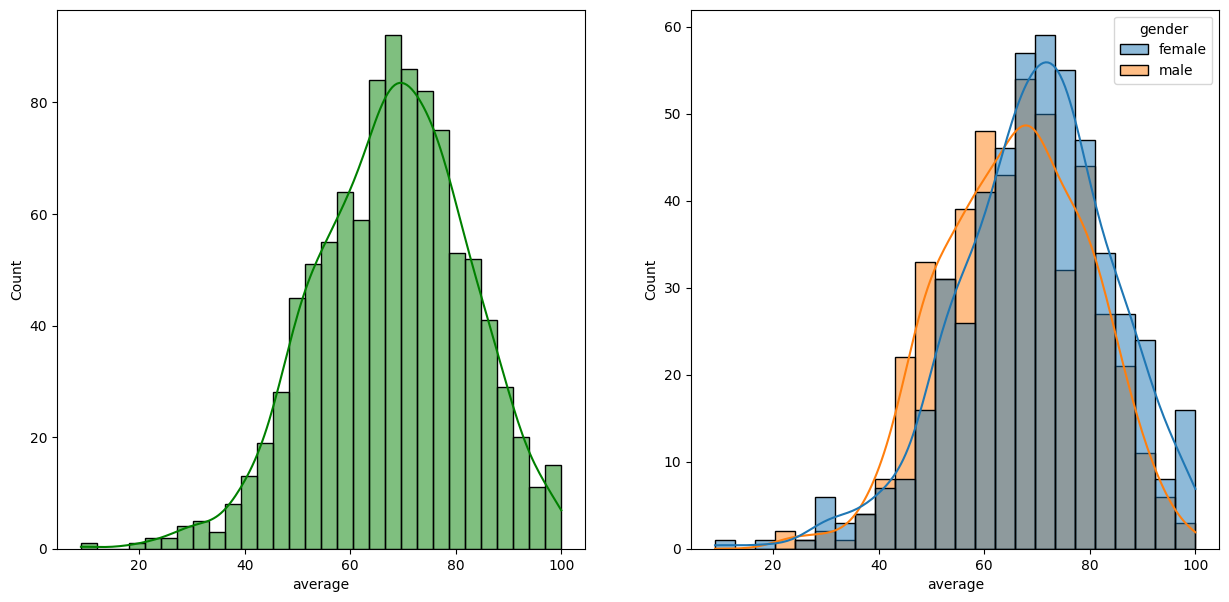

In [110]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df, x='average', bins=30, kde=True, color='g')
plt.subplot(122)
sns.histplot(data=df, x='average', kde=True, hue='gender')
plt.show()

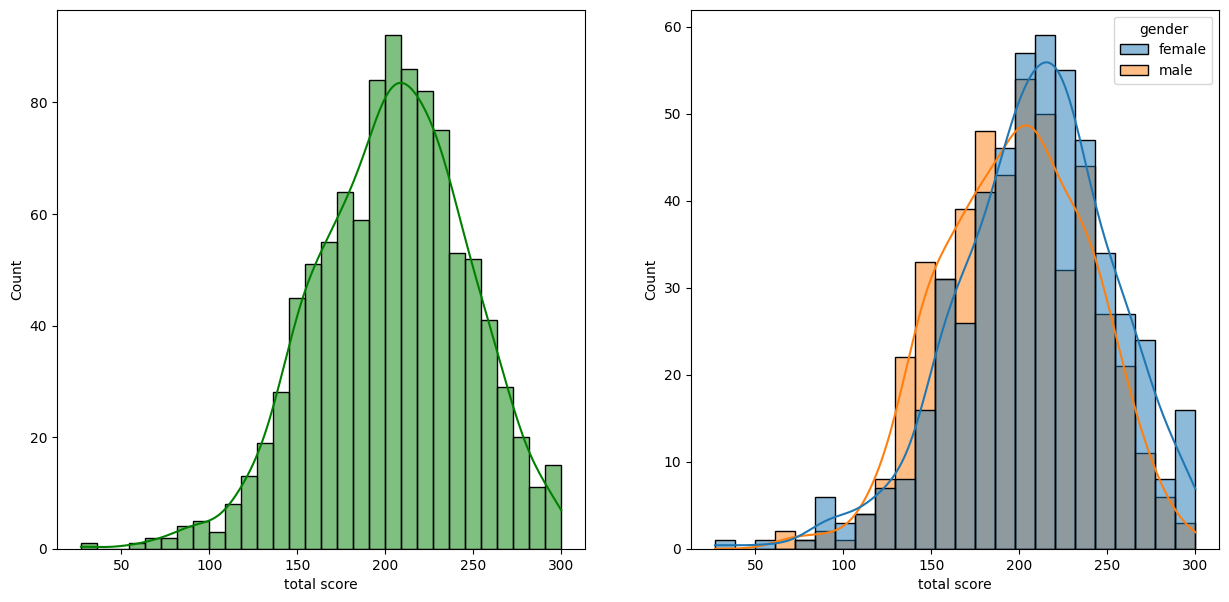

In [111]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df, x='total score', bins=30, kde=True, color='g')
plt.subplot(122)
sns.histplot(data=df, x='total score', kde=True, hue='gender')
plt.show()

#### Insights
- Female students tend to perform well then male students.

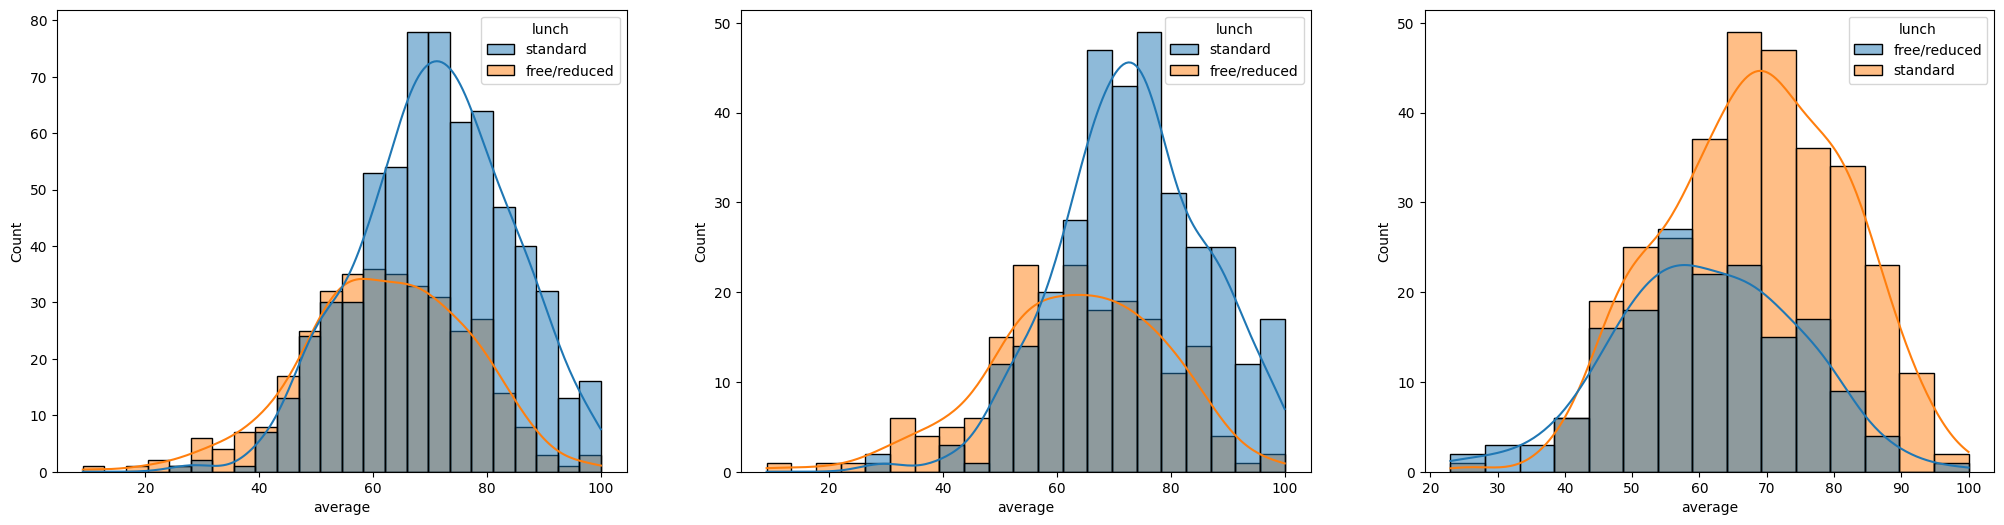

In [112]:
plt.subplots(1, 3, figsize=(25, 6))
plt.subplot(131)
sns.histplot(data=df, x='average', kde=True, hue='lunch')
plt.subplot(132)
sns.histplot(data=df[df.gender == 'female'], x='average', kde=True, hue='lunch')
plt.subplot(133)
sns.histplot(data=df[df.gender == 'male'], x='average', kde=True, hue='lunch')
plt.show()

#### Insights
- Standard lunch helps perform well in exams.
- Standard lunch helps perform well in exams be it a male or a female.

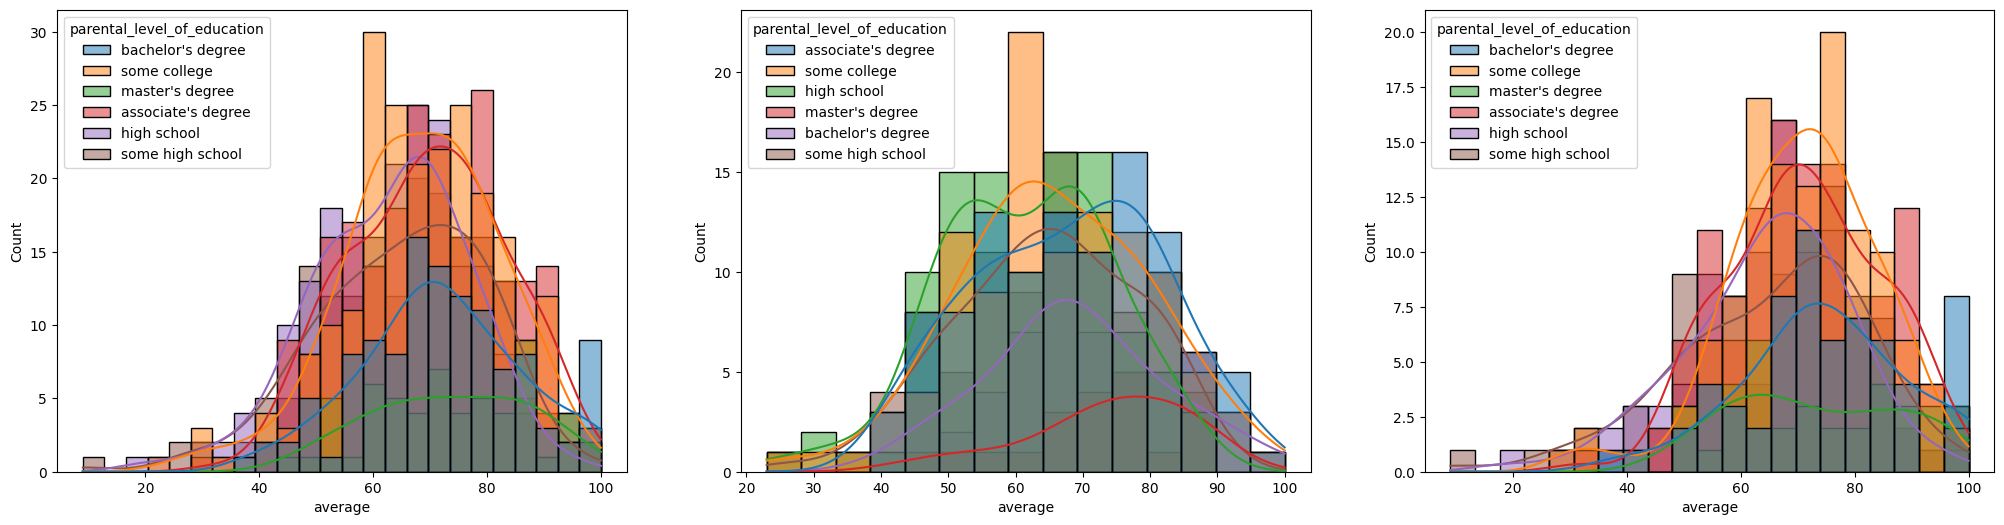

In [113]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(131)
ax = sns.histplot(data=df, x='average', kde=True,
                  hue='parental_level_of_education')
plt.subplot(132)
ax = sns.histplot(data=df[df.gender == 'male'], x='average',
                  kde=True, hue='parental_level_of_education')
plt.subplot(133)
ax = sns.histplot(data=df[df.gender == 'female'], x='average',
                  kde=True, hue='parental_level_of_education')
plt.show()

#### Insights
- In general parent's education don't help student perform well in exam.
- 2nd plot shows that parent's whose education is of associate's degree or master's degree their male child tend to perform well in exam
- 3rd plot we can see there is no effect of parent's education on female students.

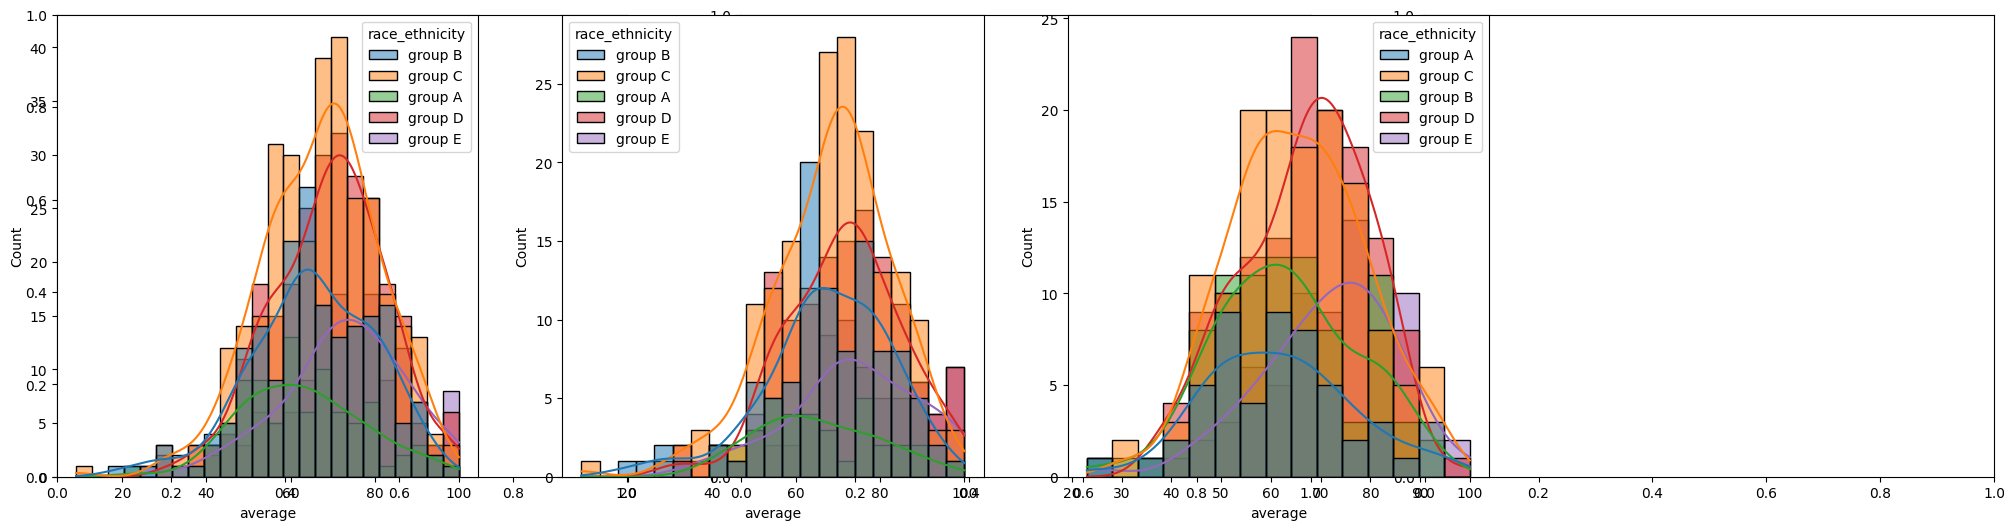

In [114]:
plt.subplots(1, 3, figsize=(25, 6))
plt.subplot(141)
ax = sns.histplot(data=df, x='average', kde=True, hue='race_ethnicity')
plt.subplot(142)
ax = sns.histplot(data=df[df.gender == 'female'],
                  x='average', kde=True, hue='race_ethnicity')
plt.subplot(143)
ax = sns.histplot(data=df[df.gender == 'male'],
                  x='average', kde=True, hue='race_ethnicity')
plt.show()


#### Insights
- Students of group A and group B tends to perform poorly in exam.
- Students of group A and group B tends to perform poorly in exam irrespective of whether they are male or female

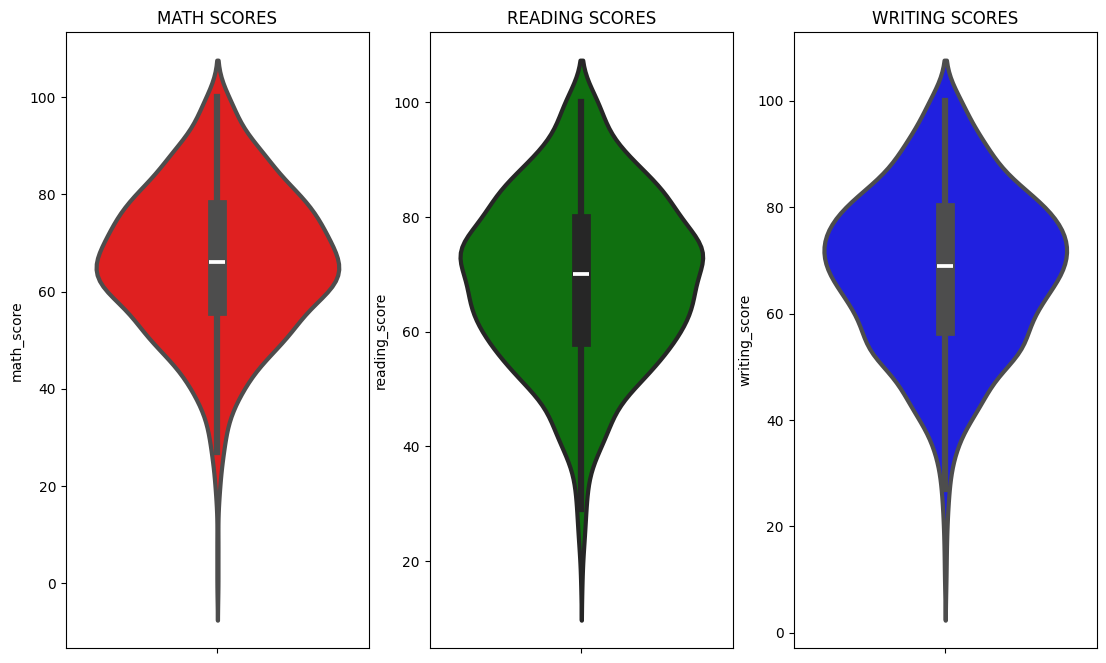

In [115]:
plt.figure(figsize=(18, 8))
plt.subplot(1, 4, 1)
plt.title('MATH SCORES')
sns.violinplot(y='math_score', data=df, color='red', linewidth=3)
plt.subplot(1, 4, 2)
plt.title('READING SCORES')
sns.violinplot(y='reading_score', data=df, color='green', linewidth=3)
plt.subplot(1, 4, 3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing_score', data=df, color='blue', linewidth=3)
plt.show()

### Insights
- From the above three plots its clearly visible that most of the students score in between 60-80 in Maths whereas in reading and writing most of them score from 50-80

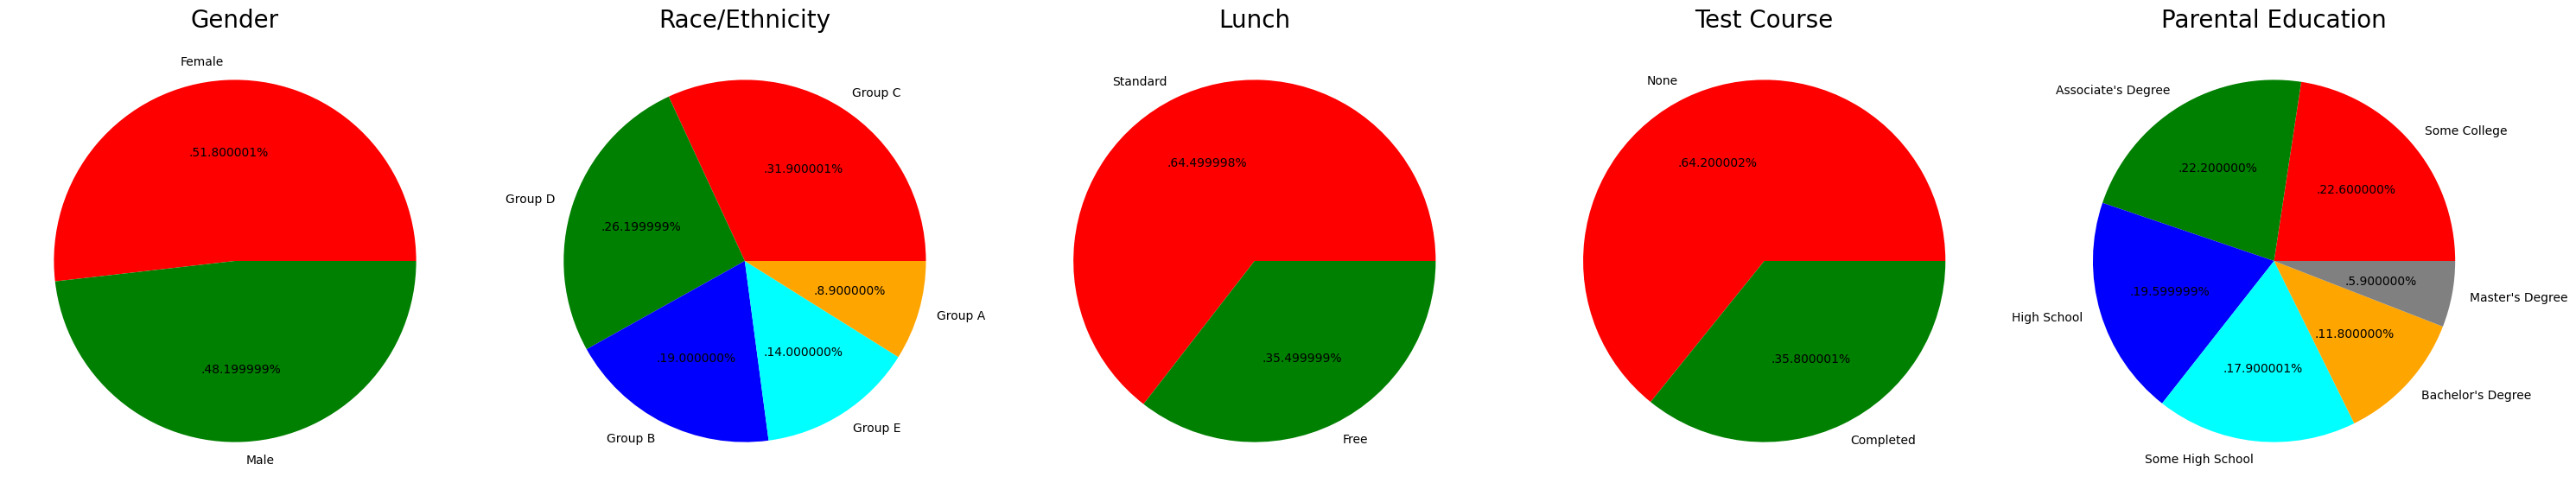

In [116]:
plt.rcParams['figure.figsize'] = (30, 12)

plt.subplot(1, 5, 1)
size = df['gender'].value_counts()
labels = 'Female', 'Male'
color = ['red', 'green']


plt.pie(size, colors=color, labels=labels, autopct='.%2f%%')
plt.title('Gender', fontsize=20)
plt.axis('off')


plt.subplot(1, 5, 2)
size = df['race_ethnicity'].value_counts()
labels = 'Group C', 'Group D', 'Group B', 'Group E', 'Group A'
color = ['red', 'green', 'blue', 'cyan', 'orange']

plt.pie(size, colors=color, labels=labels, autopct='.%2f%%')
plt.title('Race/Ethnicity', fontsize=20)
plt.axis('off')


plt.subplot(1, 5, 3)
size = df['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red', 'green']

plt.pie(size, colors=color, labels=labels, autopct='.%2f%%')
plt.title('Lunch', fontsize=20)
plt.axis('off')


plt.subplot(1, 5, 4)
size = df['test_preparation_course'].value_counts()
labels = 'None', 'Completed'
color = ['red', 'green']

plt.pie(size, colors=color, labels=labels, autopct='.%2f%%')
plt.title('Test Course', fontsize=20)
plt.axis('off')


plt.subplot(1, 5, 5)
size = df['parental_level_of_education'].value_counts()
labels = 'Some College', "Associate's Degree", 'High School', 'Some High School', "Bachelor's Degree", "Master's Degree"
color = ['red', 'green', 'blue', 'cyan', 'orange', 'grey']

plt.pie(size, colors=color, labels=labels, autopct='.%2f%%')
plt.title('Parental Education', fontsize=20)
plt.axis('off')


plt.tight_layout()
plt.grid()

plt.show()

#### Insights
- Number of Male and Female students is almost equal
- Number students are greatest in Group C
- Number of students who have standard lunch are greater
- Number of students who have not enrolled in any test preparation course is greater
- Number of students whose parental education is "Some College" is greater followed closely by "Associate's Degree"
### 4.4 Feature Wise Visualization
#### 4.4.1 GENDER COLUMN
- How is distribution of Gender ?
- Is gender has any impact on student's performance ?
### UNIVARIATE ANALYSIS ( How is distribution of Gender ? )

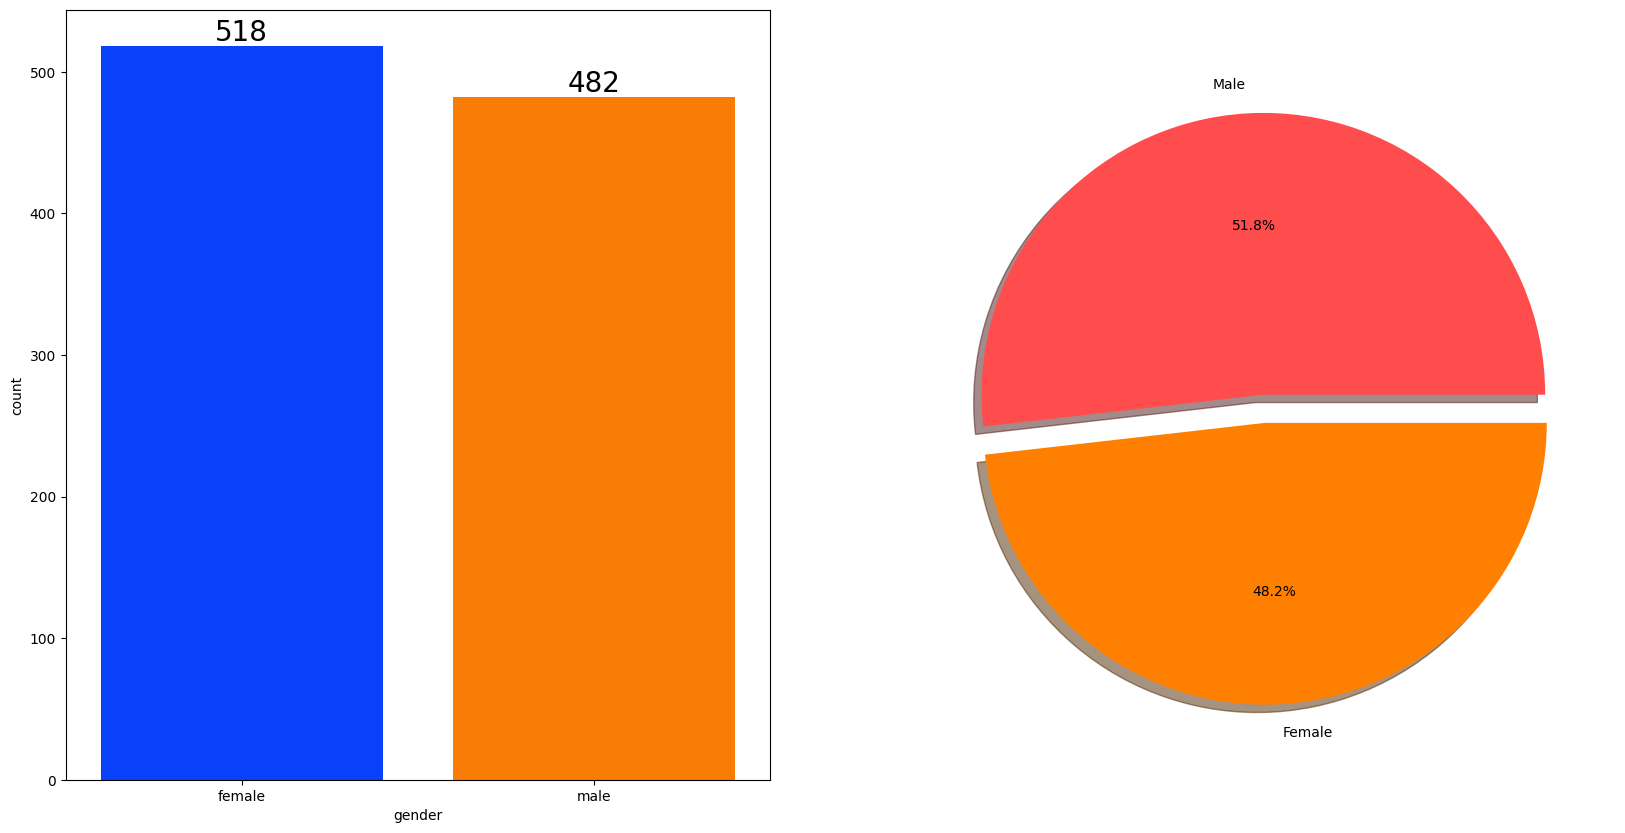

In [117]:
f, ax = plt.subplots(1, 2, figsize=(20, 10))
sns.countplot(x=df['gender'], data=df, palette='bright',
              ax=ax[0], saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=20)

plt.pie(x=df['gender'].value_counts(), labels=['Male', 'Female'], explode=[
        0, 0.1], autopct='%1.1f%%', shadow=True, colors=['#ff4d4d', '#ff8000'])
plt.show()

#### Insights
- Gender has balanced data with female students are 518 (48%) and male students are 482 (52%)

### BIVARIATE ANALYSIS ( Is gender has any impact on student's performance ? )

In [118]:
gender_group = df.groupby('gender')
gender_group.sum()

,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total score,average
gender,,,,,,,,,
female,group Bgroup Cgroup Bgroup Bgroup Bgroup Bgrou...,bachelor's degreesome collegemaster's degreeas...,standardstandardstandardstandardstandardfree/r...,nonecompletednonenonecompletednonenonenonenone...,32962,37611,37538,108111,36037.000000
male,group Agroup Cgroup Bgroup Dgroup Cgroup Dgrou...,associate's degreesome collegesome collegehigh...,free/reducedstandardfree/reducedfree/reducedst...,nonenonenonecompletednonenonecompletednonecomp...,33127,31558,30516,95201,31733.666667


In [126]:
df.columns


Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score', 'total score', 'average'],
      dtype='object')

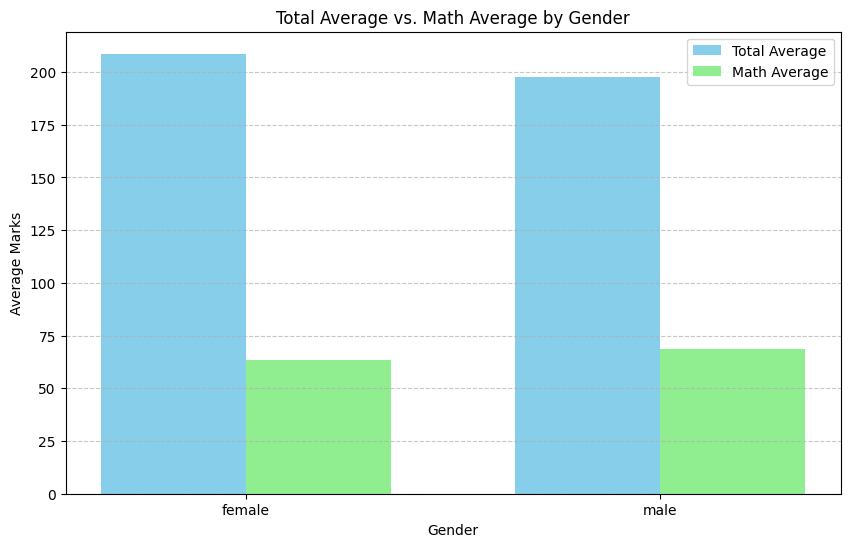

In [128]:
# Create new columns: Total Average and Math Average
# df['Total Average'] = df[['math_score',
#                           'reading_score', 'writing_score']].mean(axis=1)
# # Assuming Math Average is the same as math_score
# df['Math Average'] = df['math_score']

# Group the data by gender and calculate the mean of Total Average and Math Average
avg_scores = df.groupby(
    'gender')[['total score', 'math_score']].mean().reset_index()

# Plotting the bar plot
plt.figure(figsize=(10, 6))
bar_width = 0.35
index = range(len(avg_scores))

# Create bars for Total Average and Math Average
plt.bar(index, avg_scores['total score'], bar_width,
        label='Total Average', color='skyblue')
plt.bar([i + bar_width for i in index], avg_scores['math_score'],
        bar_width, label='Math Average', color='lightgreen')

# Adding labels and title
plt.xlabel('Gender')
plt.ylabel('Average Marks')
plt.title('Total Average vs. Math Average by Gender')
plt.xticks([i + bar_width / 2 for i in index], avg_scores['gender'])
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the plot
plt.show()

In [129]:
avg_scores

,gender,total score,math_score
0,female,208.708494,63.633205
1,male,197.512448,68.728216


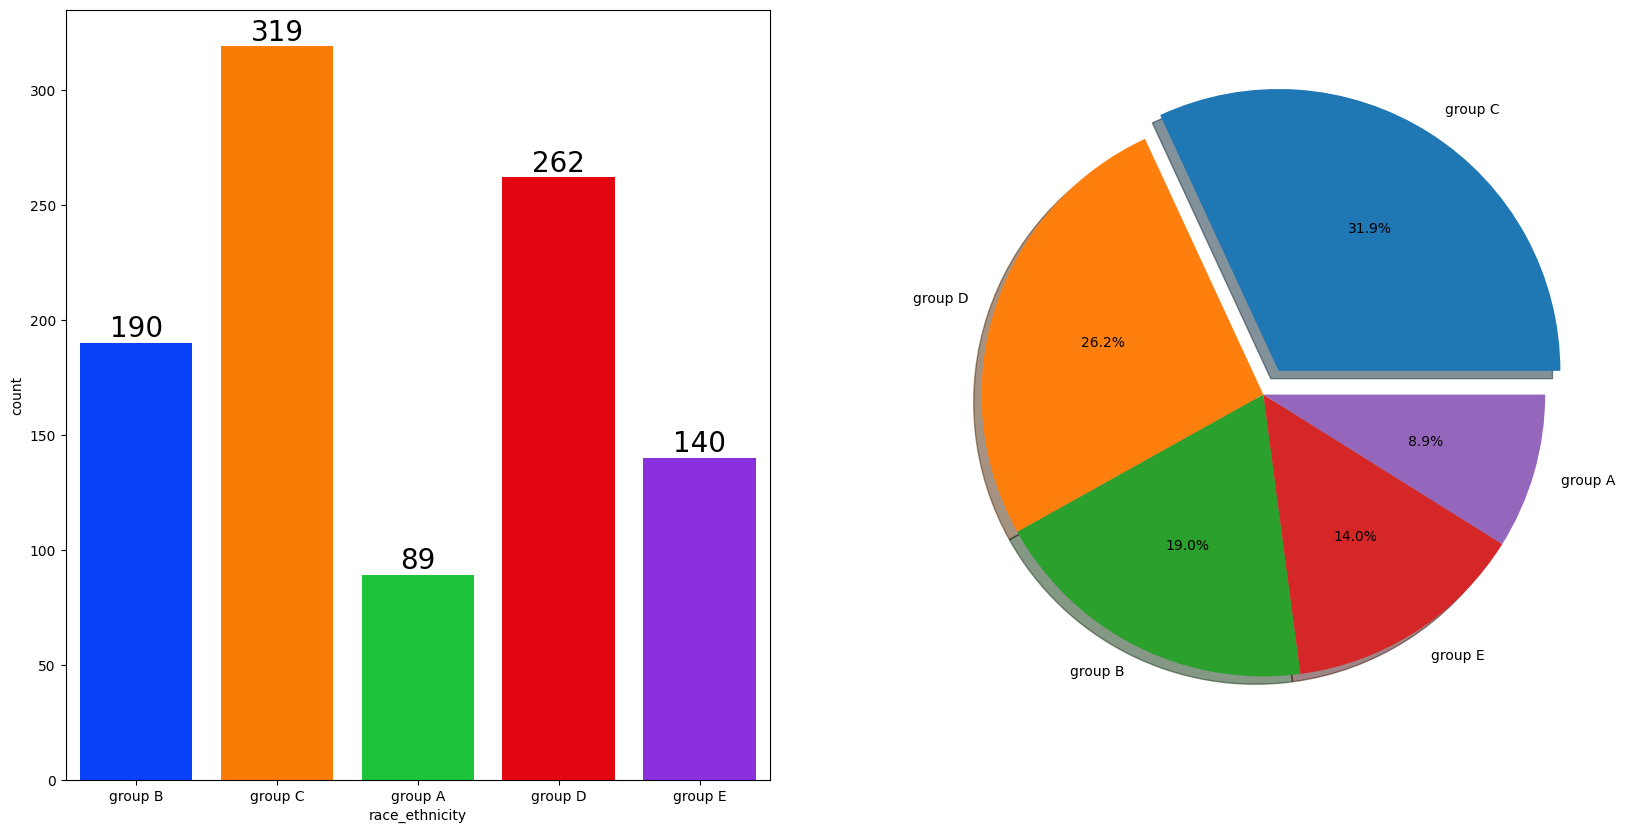

In [130]:
f, ax = plt.subplots(1, 2, figsize=(20, 10))
sns.countplot(x=df['race_ethnicity'], data=df,
              palette='bright', ax=ax[0], saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=20)

plt.pie(x=df['race_ethnicity'].value_counts(), labels=df['race_ethnicity'].value_counts().index,
        explode=[0.1, 0, 0, 0, 0], autopct='%1.1f%%', shadow=True)
plt.show()

#### Insights
- On an average females have a better overall score than men.
- whereas males have scored higher in Maths.
#### 4.4.2 RACE/EHNICITY COLUMN
- How is Group wise distribution ?
- Is Race/Ehnicity has any impact on student's performance ?
#### UNIVARIATE ANALYSIS ( How is Group wise distribution ?)

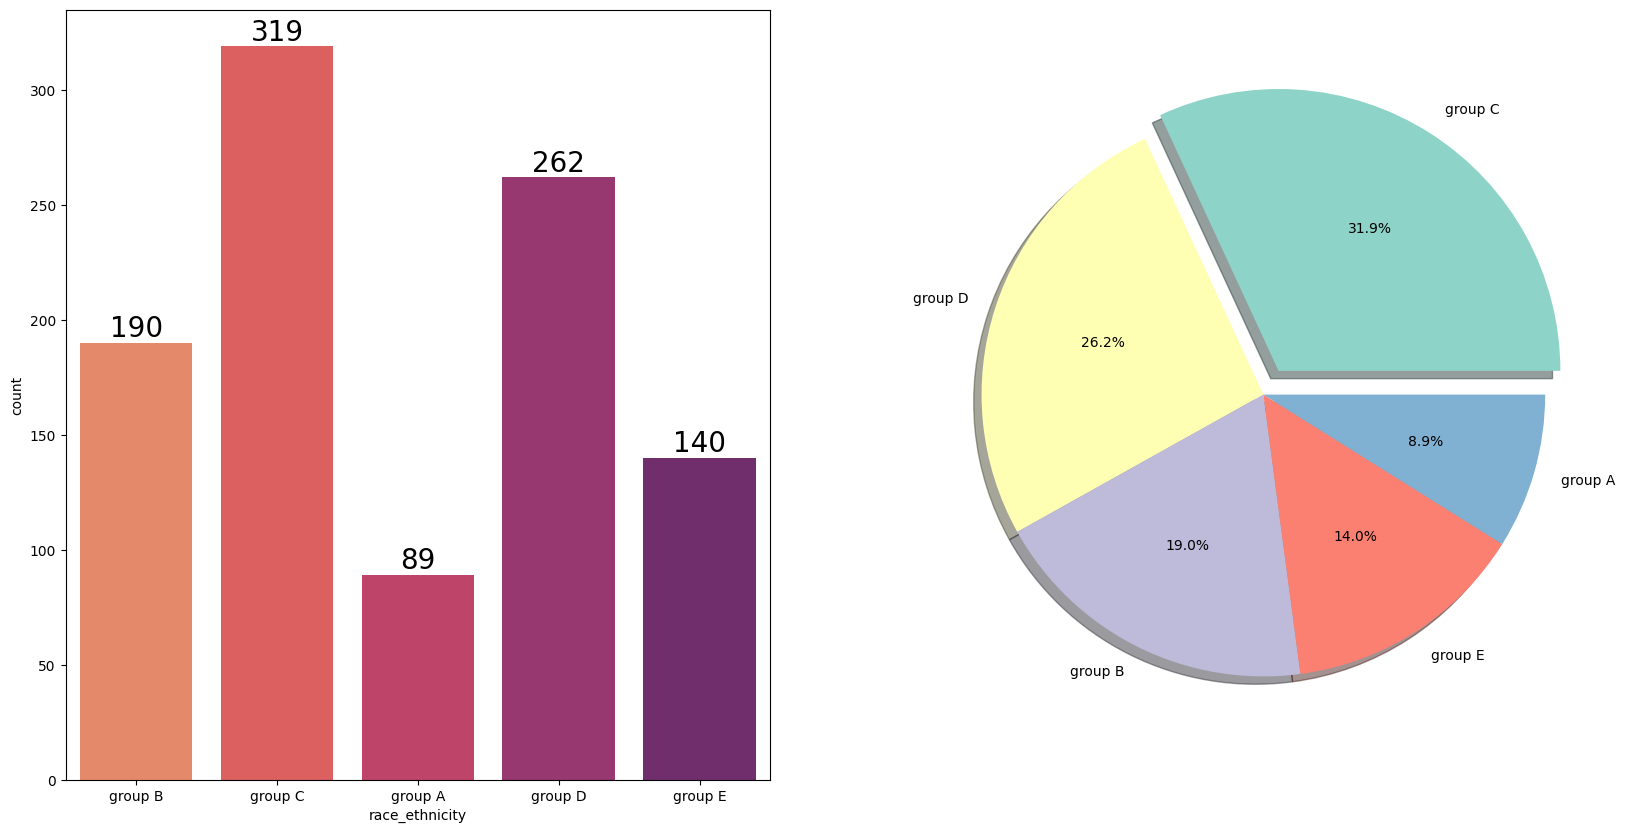

In [149]:
f, ax = plt.subplots(1, 2, figsize=(20, 10))
sns.countplot(x=df['race_ethnicity'], data=df,
              palette='flare', ax=ax[0], saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=20)

plt.pie(x=df['race_ethnicity'].value_counts(), labels=df['race_ethnicity'].value_counts().index,
        explode=[0.1, 0, 0, 0, 0], autopct='%1.1f%%', shadow=True, colors=sns.color_palette('Set3'))
plt.show()

#### Insights
- Most of the student belonging from group C /group D.
- Lowest number of students belong to groupA.
#### BIVARIATE ANALYSIS ( Is Race/Ehnicity has any impact on student's performance ? )

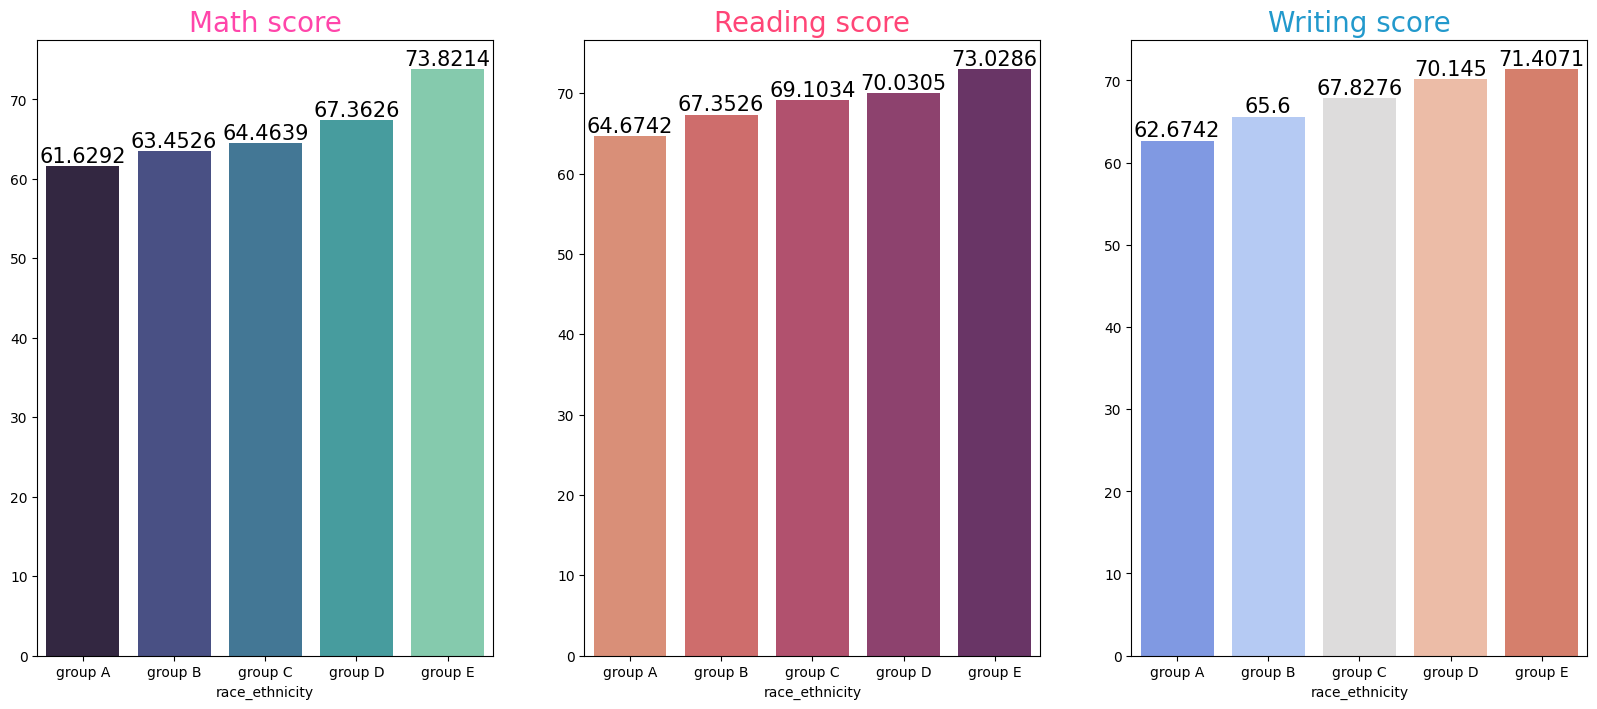

In [141]:
Group_data2 = df.groupby('race_ethnicity')
f, ax = plt.subplots(1, 3, figsize=(20, 8))
sns.barplot(x=Group_data2['math_score'].mean(
).index, y=Group_data2['math_score'].mean().values, palette='mako', ax=ax[0])
ax[0].set_title('Math score', color='#ff45aa', size=20)

for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=15)

sns.barplot(x=Group_data2['reading_score'].mean(
).index, y=Group_data2['reading_score'].mean().values, palette='flare', ax=ax[1])
ax[1].set_title('Reading score', color='#ff4577', size=20)

for container in ax[1].containers:
    ax[1].bar_label(container, color='black', size=15)

sns.barplot(x=Group_data2['writing_score'].mean(
).index, y=Group_data2['writing_score'].mean().values, palette='coolwarm', ax=ax[2])
ax[2].set_title('Writing score', color='#2299cc', size=20)

for container in ax[2].containers:
    ax[2].bar_label(container, color='black',size=15)

#### Insights
- Group E students have scored the highest marks.
- Group A students have scored the lowest marks.
- Students from a lower Socioeconomic status have a lower avg in all course subjects
#### 4.4.3 PARENTAL LEVEL OF EDUCATION COLUMN
- What is educational background of student's parent ?
- Is parental education has any impact on student's performance ?
#### UNIVARIATE ANALYSIS ( What is educational background of student's parent ? )

In [160]:
df.columns

Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score', 'total score', 'average'],
      dtype='object')

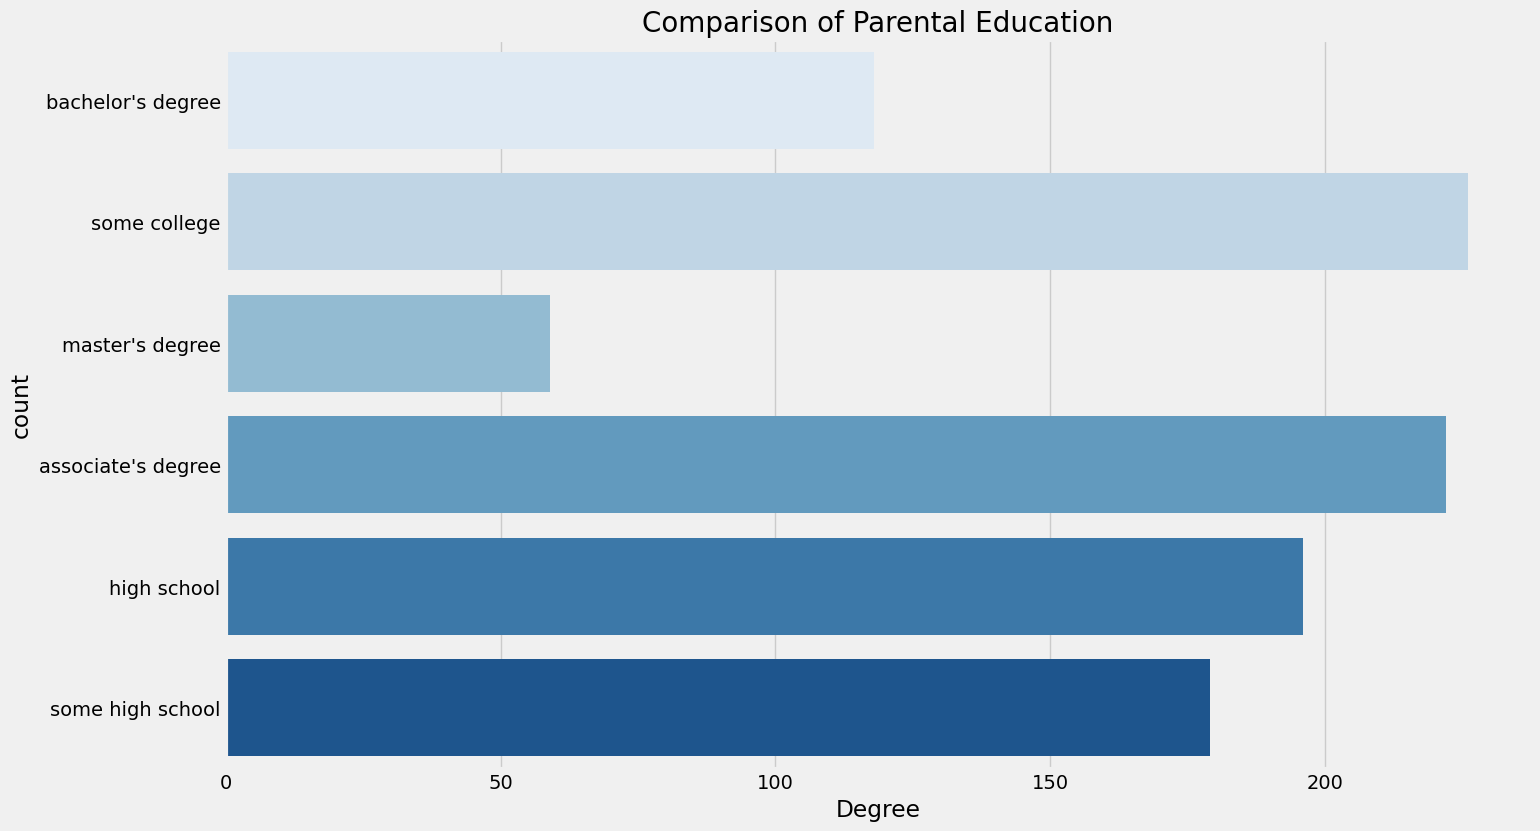

In [161]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('fivethirtyeight')
sns.countplot(df['parental_level_of_education'], palette='Blues')
plt.title('Comparison of Parental Education', fontweight=30, fontsize=20)
plt.xlabel('Degree')
plt.ylabel('count')
plt.show()

#### Insights
- Largest number of parents are from some college.
#### BIVARIATE ANALYSIS ( Is parental education has any impact on student's performance ? )

In [168]:
df.groupby('parental_level_of_education').sum(numeric_only=True)

,math_score,reading_score,writing_score,total score,average
parental_level_of_education,,,,,
associate's degree,15070,15746,15517,46333,15444.333333
bachelor's degree,8188,8614,8659,25461,8487.000000
high school,12179,12682,12240,37101,12367.000000
master's degree,4115,4447,4465,13027,4342.333333
some college,15171,15698,15558,46427,15475.666667
some high school,11366,11982,11615,34963,11654.333333


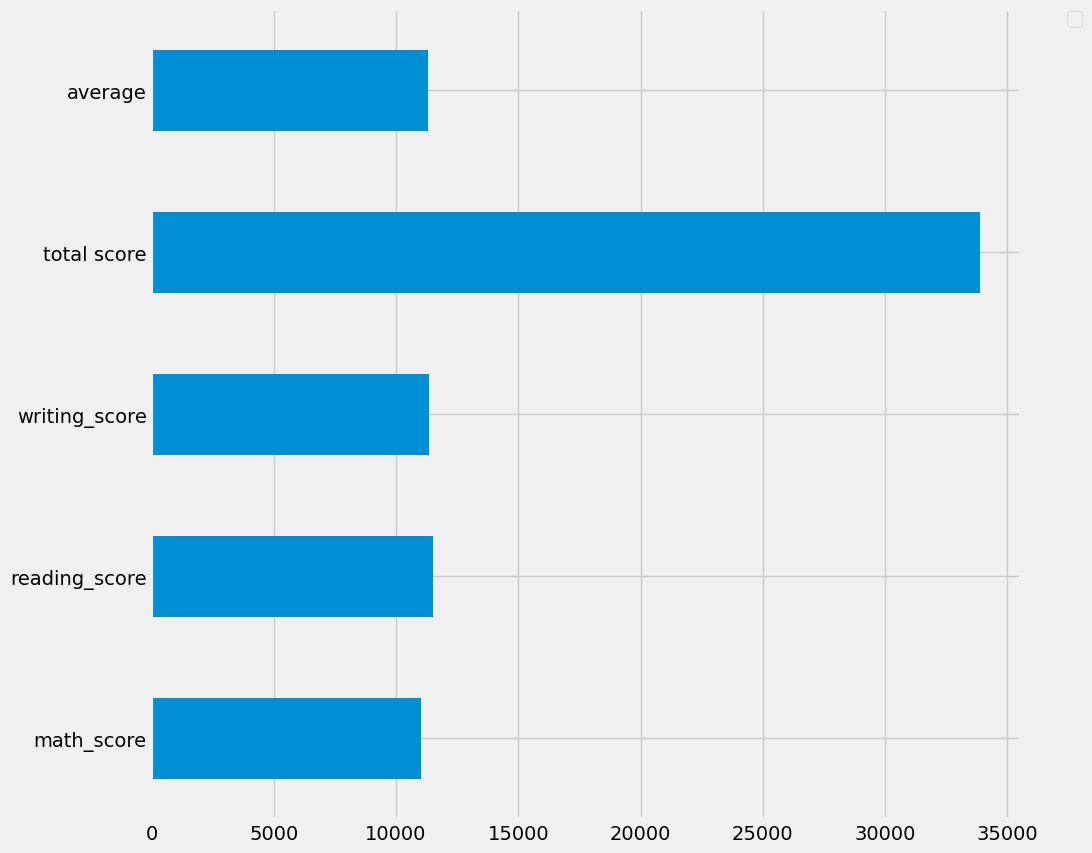

In [172]:
df.groupby('parental_level_of_education').sum(numeric_only=True).agg(
    'mean').plot(kind='barh', figsize=(10, 10))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.1)
plt.show()

#### Insights
- The score of student whose parents possess master and bachelor level education are higher than others.
#### 4.4.4 LUNCH COLUMN
- Which type of lunch is most common amoung students ?
- What is the effect of lunch type on test results?
#### UNIVARIATE ANALYSIS ( Which type of lunch is most common amoung students

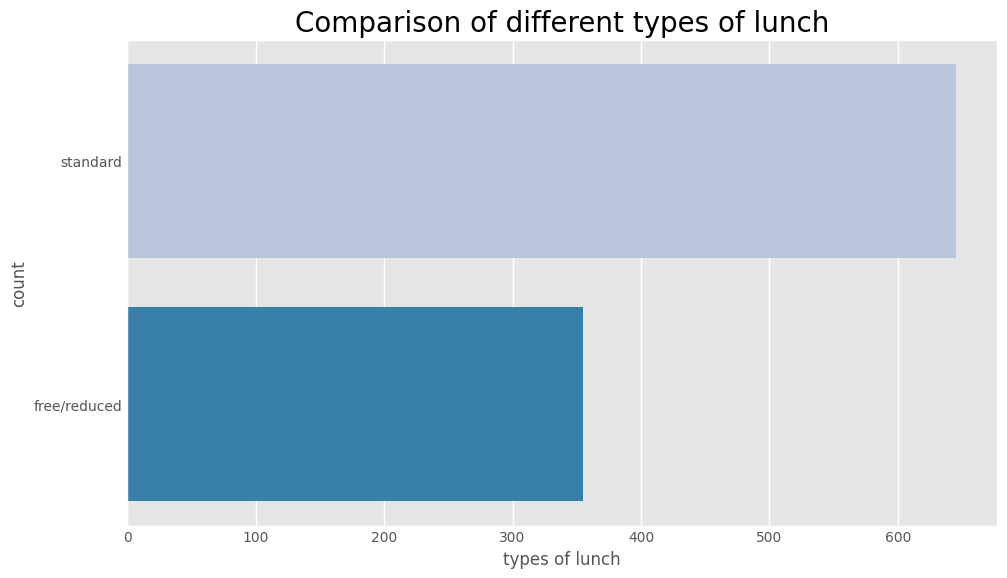

In [176]:
plt.rcParams['figure.figsize'] = (10, 6)
plt.style.use('ggplot')
sns.countplot(df['lunch'], palette='PuBu')
plt.title('Comparison of different types of lunch', fontweight=30, fontsize=20)
plt.xlabel('types of lunch')
plt.ylabel('count')
plt.show()